In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm


import math 
import statistics
from scipy import stats

In [113]:
belize_listings_file = "belize_airbnb_listings.csv"
belize_df = pd.read_csv(belize_listings_file)
belize_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.74832,-88.02474,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.73221,-88.03824,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.52114,-88.36926,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.74166,-88.02395,Entire home/apt,343,1,30,3/18/2020,0.64,22,203


## 1.	Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb data 
a.	How do you choose your bin size?


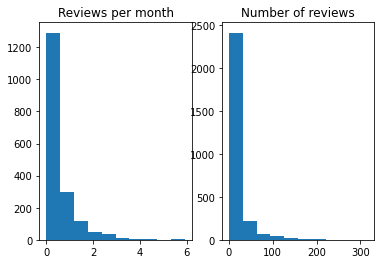

In [66]:
plt.subplot(1,2,1)
plt.hist(belize_df['reviews_per_month'],bins=10)
plt.title('Reviews per month')

plt.subplot(1,2,2)
plt.hist(belize_df['number_of_reviews'],bins=10)
plt.title('Number of reviews')
plt.show()

## 2.	Create a box and whisker plot for availability_365. What does this show you?

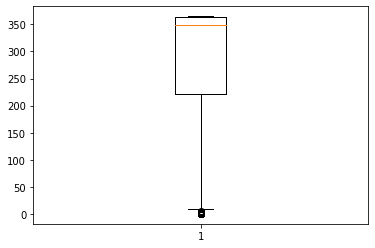

In [9]:
plt.boxplot(belize_df['availability_365'])
plt.show()

In [24]:
#As per the boxplot above we can clearly see that data is left skewed or negatively skewed. 
#which means you have more data towards higher
#number of the data in other words towards right side. 

#The third quartile is almost close to highest value for the data.
#that means 75% of the data towards highest value. 

#There are lower limit outliers but no upper limit outliers in the dataset.



## 3.	What is the probability that the price for an Airbnb is under $50.
a.	What do you notice about these records? Hint: look at the other columns.

b.	What distribution does this data most closely fit?


357.1022889842632


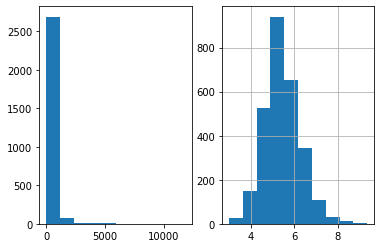

5.4584560148440975
0.8355119220837
3.235949674311032e-06
False    0.982475
True     0.017525
Name: price, dtype: float64


In [126]:
print(np.mean(belize_df['price']))
#data = belize_df['price']
#binwidth = 50
plt.subplot(1,2,1)
plt.hist(belize_df['price'])


plt.subplot(1,2,2)
log_price = np.log(belize_df['price'])
log_price.hist()#bins=range(min(data), max(data) + binwidth, binwidth))

plt.show()


log_mean = np.mean(log_price)
log_std = np.std(log_price)
print(log_mean)
print(log_std)

print(norm.cdf(1.69,log_mean,log_std))

less_50 = belize_df['price']<50
print(less_50.value_counts(True))

# The probability that the price for an Airbnb is under $50 is 0.017525.

# a this data records is right skewed.

# b this data most closely fit to normal distribution.

## 4.	Calculate the sample variance and standard deviation for all the numerical columns in the same output. 
a.	Why sample variance and not population variance?

b.	What is your takeaway for each metric?

c.	What are the scales of measurement for each of these values? 


In [60]:
print("Standard Deviation Calculation -----------------")
print(belize_df.std(numeric_only=True))

print("Variance Calculation ----------------------------")
print(belize_df.var(numeric_only=True))

Standard Deviation Calculation -----------------
id                                1.288964e+07
host_id                           1.018001e+08
latitude                          5.374396e-01
longitude                         3.838760e-01
price                             5.631248e+02
minimum_nights                    5.669843e+00
number_of_reviews                 3.032777e+01
reviews_per_month                 6.621542e-01
calculated_host_listings_count    5.171118e+01
availability_365                  1.206176e+02
dtype: float64
Variance Calculation ----------------------------
id                                1.661428e+14
host_id                           1.036327e+16
latitude                          2.888413e-01
longitude                         1.473608e-01
price                             3.171096e+05
minimum_nights                    3.214712e+01
number_of_reviews                 9.197735e+02
reviews_per_month                 4.384482e-01
calculated_host_listings_count    2.6740

In [ ]:
#a 
#because our data is not for all population, it is only for this sample size.

#b
#

#c 
#These all numbers are represented in scientific e notation. which means  1.288964e+07 is 12889640 number whereas 
#5.374396e-01 is 0.5374396. so number either +/- after e value represent exponent value.



## 5.	What percent of Airbnb listings in Belize are available 360 days a year or more?
a.	360 days or less?

b.	What distribution does this data most closely fit?


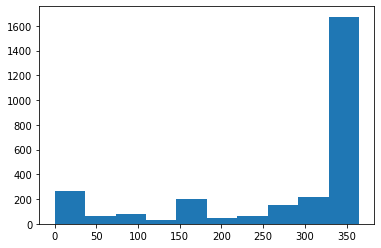

False    0.604793
True     0.395207
Name: availability_365, dtype: float64
True     0.615522
False    0.384478
Name: availability_365, dtype: float64


In [138]:
plt.hist(belize_df['availability_365'],bins=10)
plt.show()

np.mean(belize_df['availability_365'])
np.median(belize_df['availability_365'])

more_360 = belize_df['availability_365']>= 360
print(more_360.value_counts(True))

less_360 = belize_df['availability_365']<=360
print(less_360.value_counts(True))


# So 0.395207 or 39.52% Airbnb listings in Belize are available 360 days a year or more

#a 0.384478 or 38.44% Airbnb listings in Belize are available 360 days or less

#c the distribution for this data is left skewed normal distribution.

## 6.	What minimum night count are 75% of Airnbnb listing in Belize greater than?

In [161]:
night = belize_df['minimum_nights']
night

mean1 = np.mean(night)
median1 = np.median(night)
std1 = np.std(night)

norm.ppf(.75,mean1,median1)

3.6129279982462403

In [ ]:
# so 3.61 night count are 75% of Airbnb listing in belize greater than.